In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import os 

In [27]:
plt.rcParams['figure.figsize']=(15,7)

In [28]:
COUNTRY = 'DE'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')

In [29]:
load_series = df['load']
print(f"Loaded data for {COUNTRY}. Date range: {load_series.index.min()} to {load_series.index.max()}")
print(load_series.head())

Loaded data for DE. Date range: 2015-01-01 00:00:00+00:00 to 2017-04-12 03:00:00+00:00
timestamp
2015-01-01 00:00:00+00:00    41151.0
2015-01-01 01:00:00+00:00    40135.0
2015-01-01 02:00:00+00:00    39106.0
2015-01-01 03:00:00+00:00    38765.0
2015-01-01 04:00:00+00:00    38941.0
Name: load, dtype: float64


In [30]:
stl = sm.tsa.STL(load_series, period=24)
res = stl.fit()

In [31]:
output_dir = os.path.join('..', 'outputs', 'Trend')
os.makedirs(output_dir, exist_ok=True)

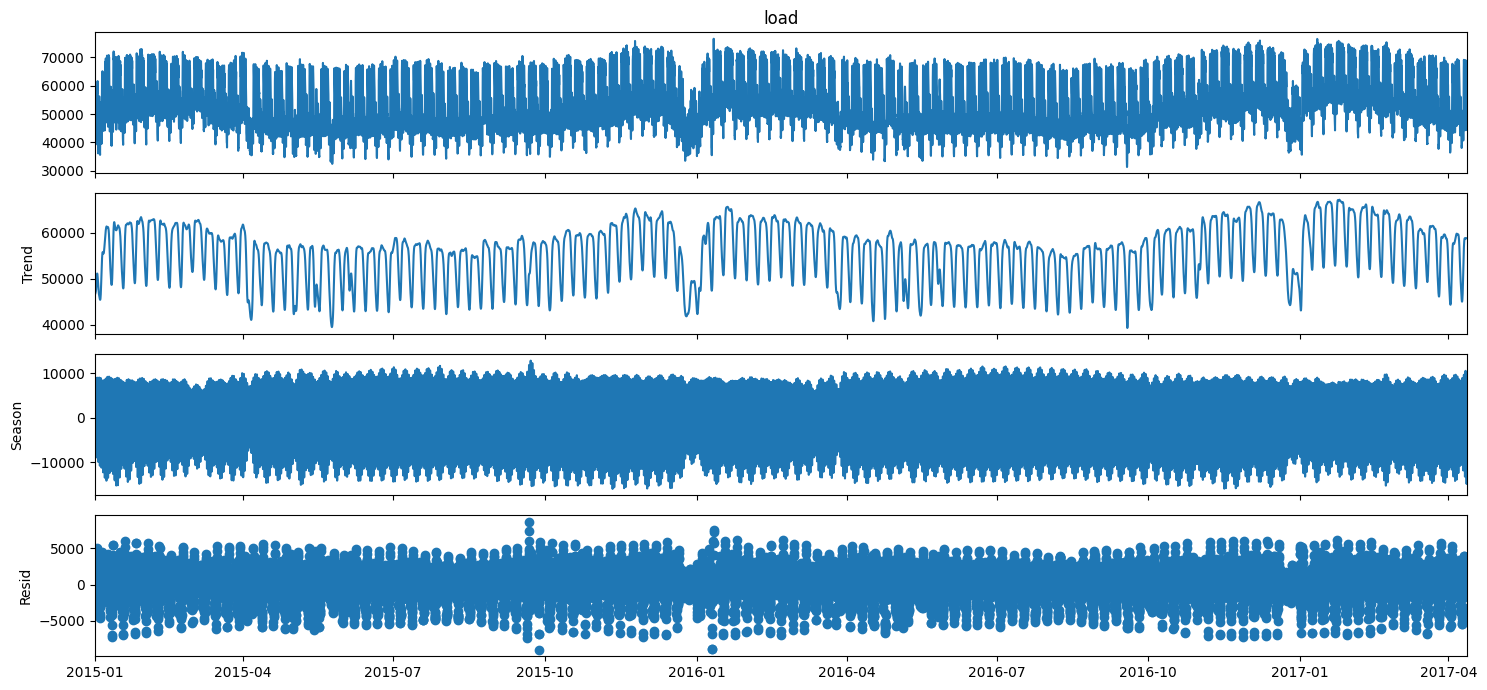

In [32]:
fig = res.plot()

In [33]:
plot_path = os.path.join(output_dir, f'{COUNTRY}_stl_plot.png')
fig.savefig(plot_path)
print(f"Saved STL plot to {plot_path}")

Saved STL plot to ../outputs/Trend/DE_stl_plot.png


In [34]:
def run_adf_test(series, name):
    print(f"ADF Test for : {name}")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")


Testing originaal non stationary data

In [35]:

run_adf_test(load_series, 'Original Series')

ADF Test for : Original Series
ADF Statistic: -17.51213358076925
p-value: 4.329394799737566e-30
The data is stationary


1st order differencing d=1

In [36]:
load_diff1 = load_series.diff(1)
run_adf_test(load_diff1, '1st Order Differencing')

ADF Test for : 1st Order Differencing
ADF Statistic: -23.87929864333373
p-value: 0.0
The data is stationary


1st order Seasonal Differencing (D=1, s=24)

In [37]:
load_seasonal_diff_24 = load_series.diff(24)
run_adf_test(load_seasonal_diff_24, '1st order Seasonal Differencing')

ADF Test for : 1st order Seasonal Differencing
ADF Statistic: -25.263230463452473
p-value: 0.0
The data is stationary


FRANCE

In [38]:
plt.rcParams['figure.figsize']=(15,7)

In [39]:
COUNTRY = 'FR'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')

In [40]:
load_series = df['load']
print(f"Loaded data for {COUNTRY}. Date range: {load_series.index.min()} to {load_series.index.max()}")
print(load_series.head())

Loaded data for FR. Date range: 2015-01-01 01:00:00+00:00 to 2017-04-12 03:00:00+00:00
timestamp
2015-01-01 01:00:00+00:00    69773.0
2015-01-01 02:00:00+00:00    66417.0
2015-01-01 03:00:00+00:00    64182.0
2015-01-01 04:00:00+00:00    63859.0
2015-01-01 05:00:00+00:00    63921.0
Name: load, dtype: float64


In [41]:
stl = sm.tsa.STL(load_series, period=24)
res = stl.fit()

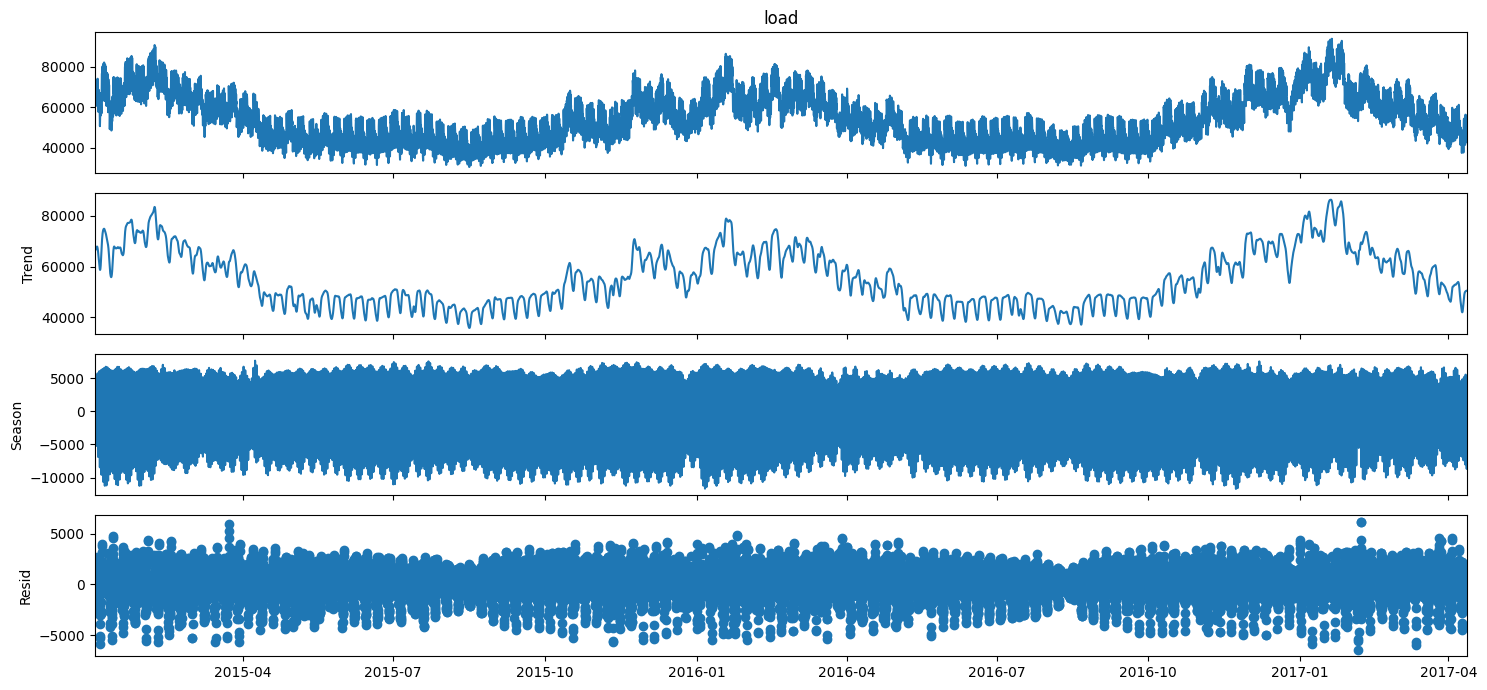

In [42]:
output_dir = os.path.join('..', 'outputs', 'Trend')
os.makedirs(output_dir, exist_ok=True)
fig = res.plot()

In [43]:
plot_path = os.path.join(output_dir, f'{COUNTRY}_stl_plot.png')
fig.savefig(plot_path)
print(f"Saved STL plot to {plot_path}")

Saved STL plot to ../outputs/Trend/FR_stl_plot.png


In [44]:
def run_adf_test(series, name):
    print(f"ADF Test for : {name}")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")


In [45]:

run_adf_test(load_series, 'Original Series')

ADF Test for : Original Series
ADF Statistic: -5.940905782194966
p-value: 2.2622347105076688e-07
The data is stationary


In [46]:
load_diff1 = load_series.diff(1)
run_adf_test(load_diff1, '1st Order Differencing')

ADF Test for : 1st Order Differencing
ADF Statistic: -22.41135551008812
p-value: 0.0
The data is stationary


In [47]:
load_seasonal_diff_24 = load_series.diff(24)
run_adf_test(load_seasonal_diff_24, '1st order Seasonal Differencing')

ADF Test for : 1st order Seasonal Differencing
ADF Statistic: -24.697485428158448
p-value: 0.0
The data is stationary


Spain

plt.rcParams['figure.figsize']=(15,7)

In [48]:
COUNTRY = 'ES'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')

In [49]:
load_series = df['load']
print(f"Loaded data for {COUNTRY}. Date range: {load_series.index.min()} to {load_series.index.max()}")
print(load_series.head())

Loaded data for ES. Date range: 2015-01-01 01:00:00+00:00 to 2017-04-12 03:00:00+00:00
timestamp
2015-01-01 01:00:00+00:00    22734.0
2015-01-01 02:00:00+00:00    21286.0
2015-01-01 03:00:00+00:00    20264.0
2015-01-01 04:00:00+00:00    19905.0
2015-01-01 05:00:00+00:00    20010.0
Name: load, dtype: float64


In [50]:
stl = sm.tsa.STL(load_series, period=24)
res = stl.fit()

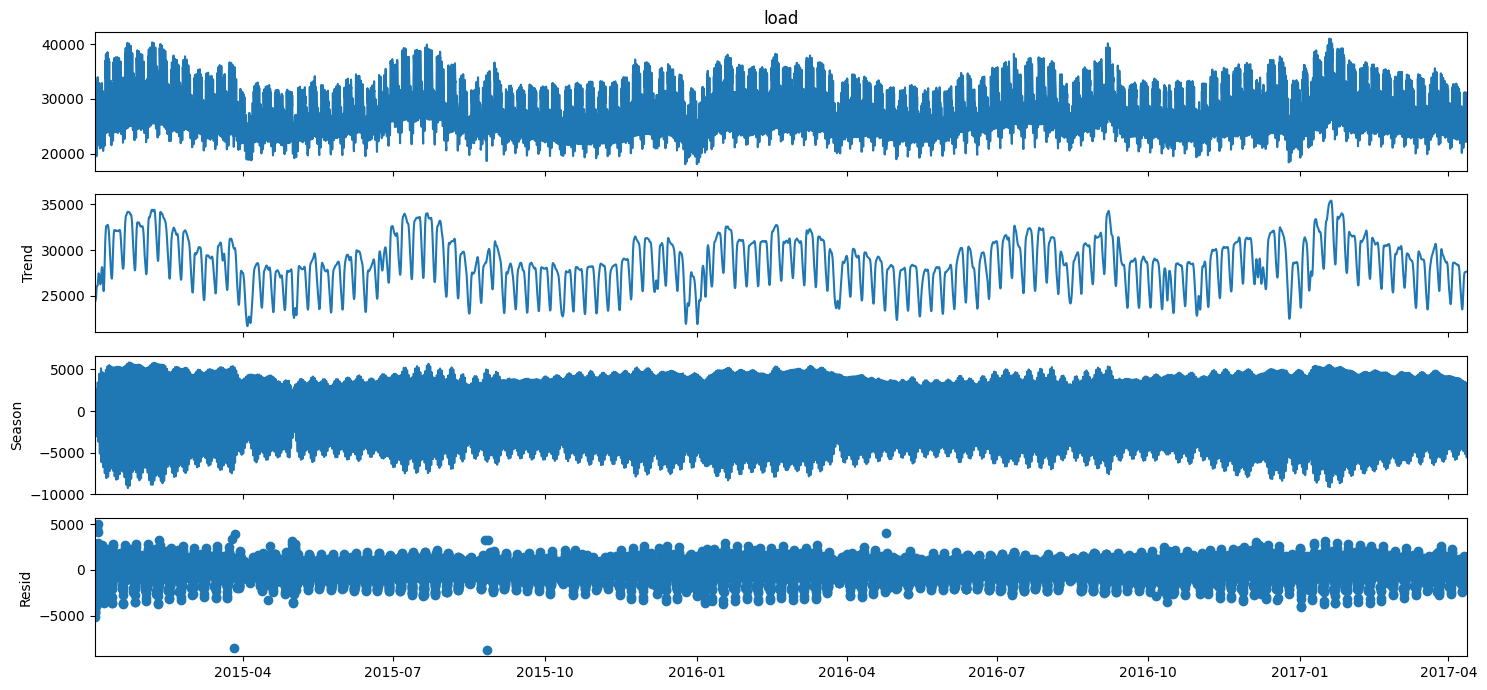

In [51]:
output_dir = os.path.join('..', 'outputs', 'Trend')
os.makedirs(output_dir, exist_ok=True)
fig = res.plot()

In [52]:
plot_path = os.path.join(output_dir, f'{COUNTRY}_stl_plot.png')
fig.savefig(plot_path)
print(f"Saved STL plot to {plot_path}")

Saved STL plot to ../outputs/Trend/ES_stl_plot.png


In [53]:
def run_adf_test(series, name):
    print(f"ADF Test for : {name}")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")


In [54]:

run_adf_test(load_series, 'Original Series')

ADF Test for : Original Series
ADF Statistic: -15.059670126253051
p-value: 9.042807693503705e-28
The data is stationary


In [55]:
load_diff1 = load_series.diff(1)
run_adf_test(load_diff1, '1st Order Differencing')

ADF Test for : 1st Order Differencing
ADF Statistic: -23.81965867522956
p-value: 0.0
The data is stationary


In [56]:
load_seasonal_diff_24 = load_series.diff(24)
run_adf_test(load_seasonal_diff_24, '1st order Seasonal Differencing')

ADF Test for : 1st order Seasonal Differencing
ADF Statistic: -26.464323193891104
p-value: 0.0
The data is stationary
